# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import IsolationForest

# **Importing Dataset**

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
Archive:  creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: creditcard.csv          


# **Graph Representation**

In [ ]:
def heatmap(y_val,predicted_val,model_name):
  cm = confusion_matrix(y_val, predicted_val)
  plt.figure(figsize=(8,4))
  sns.heatmap(cm, annot=True,cmap = "Purples", fmt="d", xticklabels=[' valid','  fraud'], yticklabels=[' valid','  fraud'])
  plt.ylabel("Actual")
  plt.xlabel("Predicted")
  plt.title(model_name)
  plt.show()


def classificationReport(y_val,predicted_val):
  print(classification_report(y_val,predicted_val, target_names=['Not Fraud', 'Fraud']))

# **Dataset**

In [ ]:
df = pd.read_csv("creditcard.csv", sep = ',')
df['Amount'] = RobustScaler().fit_transform(df['Amount'].to_numpy().reshape(-1, 1))
time = df['Time']
df['Time'] = (time - time.min()) / (time.max() - time.min())
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0


# **Splitting Dataset**

In [ ]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

not_frauds = df.query('Class == 0')
frauds = df.query('Class == 1')
not_frauds['Class'].value_counts(), frauds['Class'].value_counts()

balanced_df = pd.concat([frauds, not_frauds.sample(len(frauds), random_state=1)])
balanced_df['Class'].value_counts()

balanced_df = balanced_df.sample(frac=1, random_state=1)

In [ ]:
balanced_df_np = balanced_df.to_numpy()

x_train, y_train = balanced_df_np[:700, :-1], balanced_df_np[:700, -1].astype(int)
x_test, y_test = balanced_df_np[700:842, :-1], balanced_df_np[700:842, -1].astype(int)
x_val, y_val = balanced_df_np[842:, :-1], balanced_df_np[842:, -1].astype(int)
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

pd.Series(y_train).value_counts(), pd.Series(y_test).value_counts(), pd.Series(y_val).value_counts()

(1    353
 0    347
 Name: count, dtype: int64,
 0    73
 1    69
 Name: count, dtype: int64,
 0    72
 1    70
 Name: count, dtype: int64)

# **Logistic Regression**

              precision    recall  f1-score   support

   Not Fraud       1.00      0.97      0.98    284315
       Fraud       0.05      0.92      0.09       492

    accuracy                           0.97    284807
   macro avg       0.52      0.95      0.54    284807
weighted avg       1.00      0.97      0.98    284807



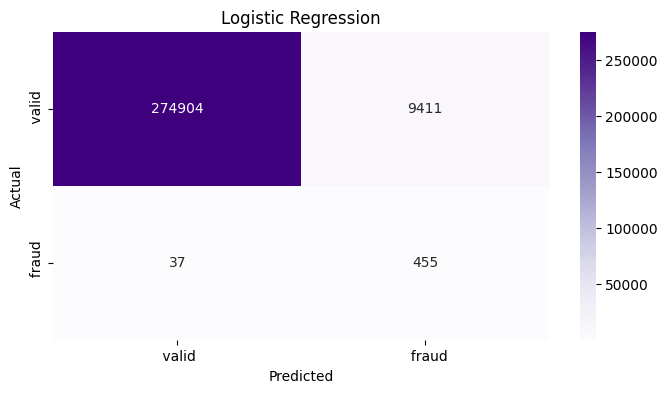

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
logistic_model.score(X, Y)

classificationReport(Y, logistic_model.predict(X))
heatmap(Y, logistic_model.predict(X), "Logistic Regression")

# **Random Forest**

              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99    284315
       Fraud       0.08      0.88      0.15       492

    accuracy                           0.98    284807
   macro avg       0.54      0.93      0.57    284807
weighted avg       1.00      0.98      0.99    284807



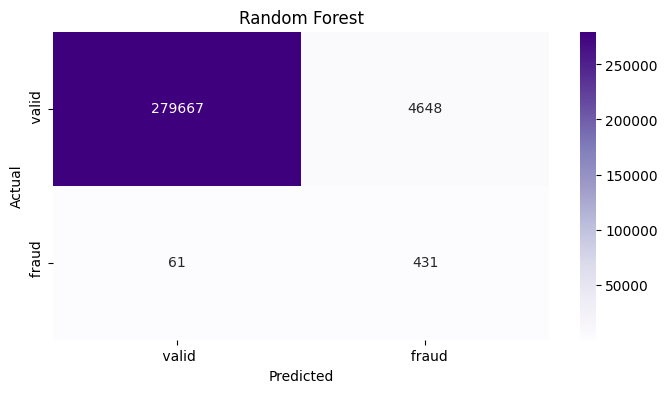

In [ ]:
rf = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf.fit(x_train, y_train)

classificationReport(Y, rf.predict(X))
heatmap(Y, rf.predict(X), "Random Forest")

# **SVC**

              precision    recall  f1-score   support

   Not Fraud       1.00      0.96      0.98    284315
       Fraud       0.04      0.93      0.08       492

    accuracy                           0.96    284807
   macro avg       0.52      0.95      0.53    284807
weighted avg       1.00      0.96      0.98    284807



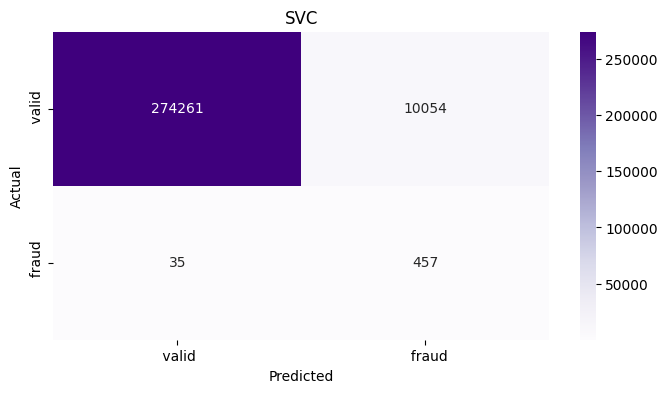

In [ ]:
svc = LinearSVC(class_weight='balanced')
svc.fit(x_train, y_train)

classificationReport(Y, svc.predict(X))
heatmap(Y, svc.predict(X), "SVC")

# **Modification for Isolation Forest**

In [ ]:
normal_df = df[df['Class'] == 0]
anomaly_df = df[df['Class'] == 1]

train_normal, temp_normal = train_test_split(normal_df, test_size=0.4, random_state=42, stratify=None)
val_normal, test_normal = train_test_split(temp_normal, test_size=0.5, random_state=42, stratify=None)

val_anomaly, test_anomaly = train_test_split(anomaly_df, test_size=0.5, random_state=42, stratify=None)

val_df = pd.concat([val_normal, val_anomaly]).sample(frac=1, random_state=42)
test_df = pd.concat([test_normal, test_anomaly]).sample(frac=1, random_state=42)

X_train = train_normal.drop(columns=['Class'])
Y_train = train_normal['Class']
X_val = val_df.drop(columns=['Class'])
Y_val = val_df['Class']
X_test = test_df.drop(columns=['Class'])
Y_test = test_df['Class']

# **Isolation Forest**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

   Not Fraud       1.00      0.99      0.99    284315
       Fraud       0.09      0.59      0.16       492

    accuracy                           0.99    284807
   macro avg       0.55      0.79      0.58    284807
weighted avg       1.00      0.99      0.99    284807



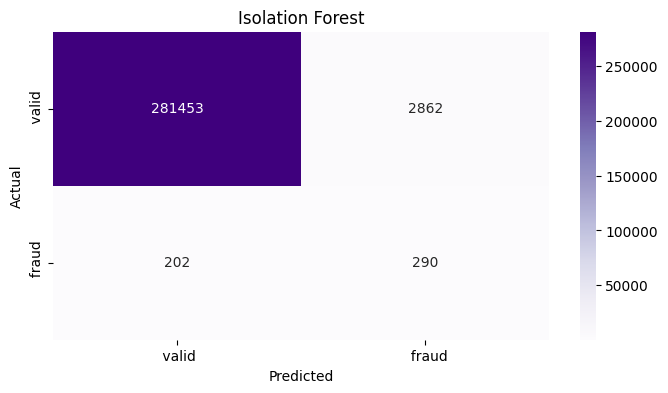

In [ ]:
iso_forest = IsolationForest(contamination= 0.01, n_estimators=200, random_state=42)
iso_forest.fit(X_train)
val_preds = iso_forest.predict(X)
val_preds_binary = (val_preds == -1).astype(int)

classificationReport(Y, val_preds_binary)
heatmap(Y, val_preds_binary, "Isolation Forest")